# 直方图均衡化

In [68]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [114]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2GRAY)

In [156]:
def histogram_equal(src):
    
    rows,cols = src.shape
    size = rows * cols
    # 直方图
    hist = np.zeros((256),dtype=np.int64)
    # 直方力归一化图
    prob = np.zeros((256),dtype=np.float64)
    tmp = np.reshape(src,(src.shape[0] * src.shape[1])).tolist()
    dst = np.zeros(src.shape,dtype=np.float64)
    # 直方图积分图,每一个像素点
    dhist = np.zeros((256,),np.float64)
    # 匀衡化后直方图
    hist_eq = np.zeros_like(hist)
    
    for i in range(256):
        # 计算灰度直方图中每个灰度对应像素的数目
        hist[i] = tmp.count(i)
        prob[i] = hist[i] / size
        
        for j in range(i):
            dhist[i] = dhist[i] + prob[j]
        # 灰度图像匀称化
        idx = (src == i)
        dst[idx] = dhist[i] * 255
        
    dst = cv2.convertScaleAbs(dst)
    tmp = np.reshape(dst,(dst.shape[0] * dst.shape[1])).tolist()
    for i in range(256):
        hist_eq[i] = tmp.count(i)
    
    return dst,hist,hist_eq

In [160]:
dst,hist,hist_eq =histogram_equal(src)

Text(0.5,1,'Histogram Equal')

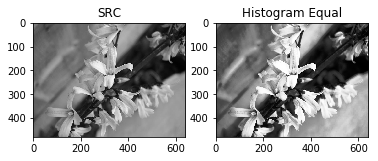

In [161]:
plt.subplot(121)
plt.imshow(src,'gray')
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst,'gray')
plt.title('Histogram Equal')

Text(0.5,1,'Histogram:Equalized')

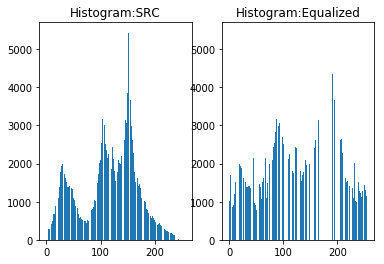

In [162]:
plt.subplot(121)
plt.bar(np.arange(0,256),hist)
plt.title('Histogram:SRC')
plt.subplot(122)
plt.bar(np.arange(0,256),hist_eq)
plt.title('Histogram:Equalized')

参考：

[1]. https://blog.csdn.net/trent1985/article/details/44992599
    
[2]. https://blog.csdn.net/qq_29441995/article/details/52503675